In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
np.set_printoptions(formatter={'float': '{: 0.5f}'.format})

In [ ]:
with open('logs/spx_randy_True_1100_Mar06-09.23.38/target.pickle', 'rb') as fp:
    # target return
    target = pickle.load(fp)
with open('logs/spx_randy_True_1100_Mar06-09.23.38/robust.pickle', 'rb') as fp:
    # robust structural cot return
    scot = pickle.load(fp)
with open('logs/spx_randy_True_1100_Mar06-09.23.38/nonrobust.pickle', 'rb') as fp:
    # reference predict
    ref = pickle.load(fp)
    
with open('logs/spx_randy_False_1100_Mar06-10.23.23/ot_robust.pickle', 'rb') as fp:
    # reference predict
    sot = pickle.load(fp)
    
with open('logs/spx_dety_1100_Mar06-10.21.10/dety_ot_robust.pickle', 'rb') as fp:
    ot = pickle.load(fp)

In [4]:
with open('logs/spx_randy_True_1600_Mar07-21.36.04/target.pickle', 'rb') as fp:
    # target return
    target = pickle.load(fp)
with open('logs/spx_randy_True_1600_Mar07-21.36.04/robust.pickle', 'rb') as fp:
    # robust structural cot return
    scot = pickle.load(fp)
with open('logs/spx_randy_True_1600_Mar07-21.36.04/nonrobust.pickle', 'rb') as fp:
    # reference predict
    ref = pickle.load(fp)
    
with open('logs/spx_randy_False_1600_Mar07-21.52.04/ot_robust.pickle', 'rb') as fp:
    # reference predict
    sot = pickle.load(fp)
    
with open('logs/spx_dety_1600_Mar07-21.42.36/dety_ot_robust.pickle', 'rb') as fp:
    ot = pickle.load(fp)

In [5]:
scot_idx = np.where(scot > target)[0]

In [6]:
len(scot_idx)

94

In [7]:
ref_idx = np.where(ref > target)[0]

In [8]:
ot_idx = np.where(ot > target)[0]

In [9]:
len(ot_idx)

94

In [10]:
sot_idx = np.where(sot > target)[0]

In [ ]:
# cot_more = []
# for k in range(len(cot_idx)):
#     if cot_idx[k] not in ref_idx:
#         print(cot_idx[k])
#         cot_more.append(cot_idx[k])

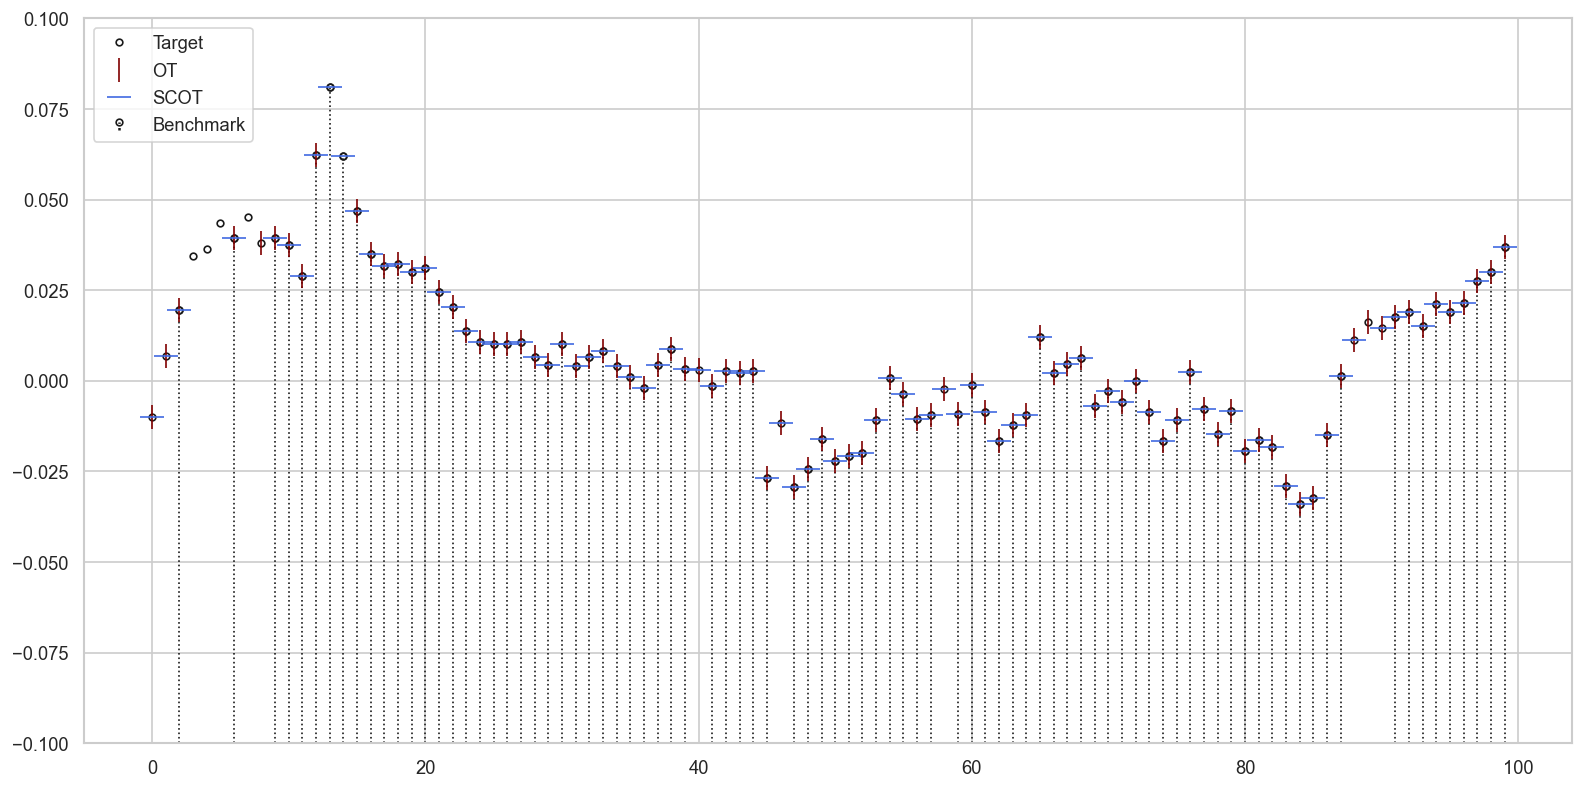

In [11]:
fig, ax = plt.subplots(figsize=(16, 8), dpi=120)
idx = np.arange(len(target))

ax.plot(idx, target, color='k', marker='o', fillstyle= 'none', linestyle='none', markersize=4, label='Target')


markerline, stemline, baseline, = ax.stem(ref_idx, target[ref_idx], linefmt=':',markerfmt='o', basefmt='k', 
                                           bottom=-0.10, label='Benchmark')
plt.setp(stemline, linewidth = 1.0, color='k')
plt.setp(markerline, markersize = 4, color='k', fillstyle='none')
plt.setp(baseline, linestyle='none')

ax.plot(ot_idx, target[ot_idx], color='maroon', marker='|', linestyle='none', 
         markersize=14, label='OT')

ax.plot(scot_idx, target[scot_idx], color='royalblue', marker='_', linestyle='none',
         markersize=14,  label='SCOT') # fillstyle= 'right', markeredgecolor='grey',

# plt.vlines(x=cot_more, ymin=0.03, ymax=0.08, colors='purple', ls='--', lw=0.5, label='COT added')
# plt.vlines(x=ot_more, ymin=-0.08, ymax=-0.03, colors='green', ls='--', lw=0.5, label='OT added')
# plt.vlines(x=scot_idx, ymin=0.01, ymax=0.03, colors='tab:red', ls='-', lw=0.5, label='SCOT')
# plt.vlines(x=ot_idx, ymin=-0.01, ymax=0.01, colors='tab:orange', ls='-', lw=0.5, label='OT')
# plt.stem(ref_idx, target[ref_idx], linefmt=':', markerfmt='o', bottom=-0.08, label='Ref')

#  ax.grid(axis='x')
ax.set_ylim([-0.10, 0.10])
# ax.set_xlim([datetime.date(2014, 6, 1), datetime.date(2014, 11, 3)])
# date_form = mdates.DateFormatter("%Y-%m-%d")
# ax.xaxis.set_major_formatter(date_form)

# ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

# fig.autofmt_xdate()

plt.legend(loc='upper left')

plt.show()
# plt.savefig('sp1100.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

In [ ]:
np.mean(target) 

In [ ]:
np.sum(sot - scot)

In [ ]:
plt.hist(np.divide(ot - target, target))

In [ ]:
plt.hist(np.divide(sot - target, target))

In [ ]:
sns.violinplot(x=np.divide(ot - target, target))

In [ ]:
sns.violinplot(x=np.divide(scot - target, target))

In [13]:
np.sum(scot > ref)/100

1.0

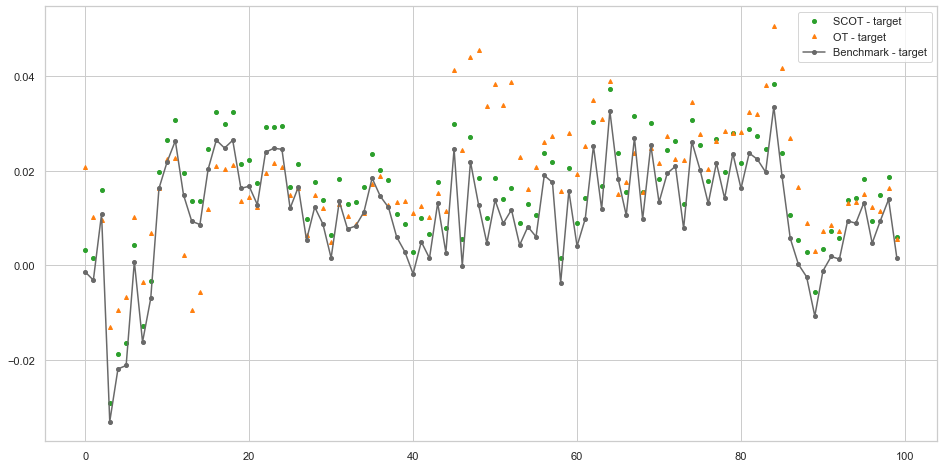

In [14]:
plt.figure(figsize=(16, 8))
plt.plot(scot - target, marker='o', markersize=4, color= 'tab:green', linestyle='none', label='SCOT - target')
# plt.plot(sot - target, marker='.',  linestyle='none', label='SOT') 
plt.plot(ot - target, marker='^', markersize=4, linestyle='none', color='tab:orange', label='OT - target') # fillstyle='none'
plt.plot(ref - target, marker='o', markersize=4, linestyle='-', color='dimgrey', label='Benchmark - target')
plt.legend(loc='best')
plt.show()
# plt.savefig('sp_diff1100.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

In [13]:
np.abs(target).mean(), target.std()

(0.02654037648856841, 0.02678786618455895)

In [ ]:
SP = pd.read_csv('SP_Sub.csv')

In [ ]:
np.log(np.divide(SP['Close'][1120:1220].to_numpy(), SP['Close'][1100:1200].to_numpy())) - target

# Table Statistics

# Accuracy 

In [6]:
# Benchmark
(81 + 58 + 23 + 57 + 40 + 56 + 87 + 43 + 73)/9

57.55555555555556

In [7]:
# SCOT
(89 + 71 + 38 + 67 + 46 + 66 + 94 + 68 + 80)/9

68.77777777777777

In [9]:
# SOT
(89 + 71 + 38 + 67 + 46 + 66 + 94 + 68 + 80)/9

68.77777777777777

In [8]:
# OT
(95 + 62 + 47 + 68 + 50 + 75 + 94 + 60 + 100)/9

72.33333333333333

## MAE 

In [2]:
# benchmark
(1.1515 + 1.1865 + 1.4840 + 1.7390 + 2.5014 + 1.1630 + 1.3528 + 0.8979 + 1.0974)/9

1.3970555555555557

In [3]:
# SCOT
(1.3546 + 1.3870 + 1.3163 + 1.8110 + 2.4229 + 1.2247 + 1.7659 + 1.0115 + 1.2284)/9

1.502477777777778

In [4]:
# SOT 
(1.3631 + 1.3910 + 1.3159 + 1.8219 + 2.4227 + 1.2373 + 1.7698 + 1.0124 + 1.2352)/9

1.5077

In [5]:
# OT
(1.8400 + 2.0529 + 1.4840 + 2.1626 + 2.8844 + 1.6572 + 1.9459 + 0.8932 + 1.8786)/9

1.8665333333333334